# Data Modelling

## Introduction



* This notebook will include multiple models to classify whether the tewwts describe a disaster or not
* The result from multiple model will be compared to find the best model.
* The cleaned csv files from Data Cleaning notebooks are the inputs to this notebook.

## Importing libraries

In [239]:
# Importing required libraries

import os              # To interact with OS(get directory info)
import pandas as pd    # For data manipulation
import matplotlib.pyplot as plt  # To plot ROC Curve
import sklearn.metrics as metrics  # To calculate TPR, FPR, ROC-AUC and F score
from sklearn.model_selection import train_test_split # To split train and test data
from sklearn.feature_extraction.text import TfidfTransformer #To vectorize the text
from sklearn.feature_extraction.text import CountVectorizer #To vectorize the text


from sklearn.linear_model import LogisticRegression as LogReg
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier, )
from sklearn.linear_model import SGDClassifier

from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

## Reading cleaned CSV files 

In [240]:
df_train = pd.read_csv(os.path.join(os.path.dirname('.'), '../Data Cleaning/Clean_train_data.csv'), index_col = 0)
df_test = pd.read_csv(os.path.join(os.path.dirname('.'), '../Data Cleaning/Clean_test_data.csv'), index_col = 0)

In [241]:
 df_train

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquake may allah forgive us,1
1,4,NaN,NaN,forest fire near la ronge sask canada,1
2,5,NaN,NaN,resident ask shelter place notify officer evac...,1
3,6,NaN,NaN,people receive wildfire evacuation order calif...,1
4,7,NaN,NaN,get send photo ruby alaska smoke wildfire pour...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,two giant crane hold bridge collapse nearby home,1
7609,10870,NaN,NaN,control wild fire california even northern par...,1
7610,10871,NaN,NaN,volcano hawaii,1
7611,10872,NaN,NaN,police investigate ebike collide car little po...,1


## Exploratory Data Analysis

* Exploring the affect of 'location' and 'target' columns on the target variable

In [242]:
df_train.dropna(how='any').groupby(['location','target']).agg('count').head(60)

id  keyword  text
location                      target                   
                              0        5        5     5
                              1        4        4     4
                              0        4        4     4
                              1        6        6     6
                              0        1        1     1
                              1        1        1     1
     å¡    å¡                 1        1        1     1
    ag                        0        1        1     1
   beijing                    0        2        2     2
   å¡å¡å¡                     1        1        1     1
  ave sw                      1        1        1     1
  dreamz                      0        2        2     2
  f glory                     0        1        1     1
  pnw                         0        1        1     1
  street                      0        2        2     2
 access  rt link please x     0        1        1     1
 act                          0        1        1     1
 blonde bi fry                0        1        1     1
 c h i c a g o                1        1        1     1
 ca û¢ ga                    0        1        1     1
 cloud mafia                  0        1        1     1
 countries and counting       0        1        1     1
 dimension                    1        1        1     1
 eye chakra                   1        1        1     1
 forslrp                      1        1        1     1
 high  come down              1        1        1     1
 icon by                      0        1        1     1
 in florida                   1        1        1     1
 in yokohama japan            1        1        1     1
 jamrock                      1        1        1     1
 jet life                     0        1        1     1
 kate  theythem  infpt        0        1        1     1
 libya                        1        1        1     1
 livin                        1        1        1     1
 looking goofy in nj          0        1        1     1
 made in the philippines      0        1        1     1
 miles away                   0        1        1     1
 miles from everyone          0        1        1     1
 miranda   mi                 0        1        1     1
 nw  ave portland or          0        1        1     1
 of the blam squad            0        1        1     1
 philly baby                  0        1        1     1
 queanbeyan   sydney          1        1        1     1
 st ss                        0        1        1     1
 steps ahead  cloud           1        1        1     1
 subscribers                  0        1        1     1
 taron squad                  0        1        1     1
 temperance permenence        1        1        1     1
 û¢ cc                       0        1        1     1
 åá ny                        0        1        1     1
a botanical garden probably   0        1        1     1
a box                         0        1        1     1
a hoop somewhere              0        1        1     1
a little house in the outback 1        2        2     2
a property of the universe    0        1        1     1
a small federal enclave       1        1        1     1
a sofa                        0        1        1     1
a van down by the river       0        1        1     1
aas my aztec princess         0        1        1     1
ab                            0        2        2     2

In [243]:
df_train.dropna(how='any').groupby(['location','target']).agg('count').head(60)

id  keyword  text
location                      target                   
                              0        5        5     5
                              1        4        4     4
                              0        4        4     4
                              1        6        6     6
                              0        1        1     1
                              1        1        1     1
     å¡    å¡                 1        1        1     1
    ag                        0        1        1     1
   beijing                    0        2        2     2
   å¡å¡å¡                     1        1        1     1
  ave sw                      1        1        1     1
  dreamz                      0        2        2     2
  f glory                     0        1        1     1
  pnw                         0        1        1     1
  street                      0        2        2     2
 access  rt link please x     0        1        1     1
 act                          0        1        1     1
 blonde bi fry                0        1        1     1
 c h i c a g o                1        1        1     1
 ca û¢ ga                    0        1        1     1
 cloud mafia                  0        1        1     1
 countries and counting       0        1        1     1
 dimension                    1        1        1     1
 eye chakra                   1        1        1     1
 forslrp                      1        1        1     1
 high  come down              1        1        1     1
 icon by                      0        1        1     1
 in florida                   1        1        1     1
 in yokohama japan            1        1        1     1
 jamrock                      1        1        1     1
 jet life                     0        1        1     1
 kate  theythem  infpt        0        1        1     1
 libya                        1        1        1     1
 livin                        1        1        1     1
 looking goofy in nj          0        1        1     1
 made in the philippines      0        1        1     1
 miles away                   0        1        1     1
 miles from everyone          0        1        1     1
 miranda   mi                 0        1        1     1
 nw  ave portland or          0        1        1     1
 of the blam squad            0        1        1     1
 philly baby                  0        1        1     1
 queanbeyan   sydney          1        1        1     1
 st ss                        0        1        1     1
 steps ahead  cloud           1        1        1     1
 subscribers                  0        1        1     1
 taron squad                  0        1        1     1
 temperance permenence        1        1        1     1
 û¢ cc                       0        1        1     1
 åá ny                        0        1        1     1
a botanical garden probably   0        1        1     1
a box                         0        1        1     1
a hoop somewhere              0        1        1     1
a little house in the outback 1        2        2     2
a property of the universe    0        1        1     1
a small federal enclave       1        1        1     1
a sofa                        0        1        1     1
a van down by the river       0        1        1     1
aas my aztec princess         0        1        1     1
ab                            0        2        2     2

There are a lot of irrelavent values in the the location column such as 'a sofa', 'miles away' and 'a box'. Hence, 'location' column is notincluded in the model.

In [244]:
df_train.groupby(['keyword','target']).agg('count').tail(200)

id  location  text
keyword  target                    
famine   1       26        17    26
fatal    0       12         8    12
         1       26        15    26
fatality 0       46        32    46
         1       36        24    36
...              ..       ...   ...
wound    0       34        23    34
         1       36        29    36
wreck    0       66        41    66
         1       10         6    10
wreckage 1       39        28    39

[200 rows x 3 columns]

Splitting testing and training data


In [154]:
X_train, X_test, y_train, y_test = train_test_split(df_train['text'], df_train['target'], test_size=0.3)

Method to calculate the Area under the ROC curve and F  score. Also, to plot the ROC curve.

In [155]:
def roc(pred_labels,modelname):
    
    fpr, tpr, threshold = metrics.roc_curve(y_test,pred_labels)
    auc = metrics.auc(fpr, tpr)
    f = f1_score(y_test, Log_prediction)
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate',fontsize=12)
    plt.xlabel('False Positive Rate',fontsize=12)
    plt.suptitle(modelname, fontsize=20)
    plt.show()
    return auc, f
  
    

Making a dataframe to hold the Area under the roc score and F score
from the models

In [ ]:
model_result = pd.DataFrame(columns=['Model','AUC ROC','F1'])



### Logistic regression

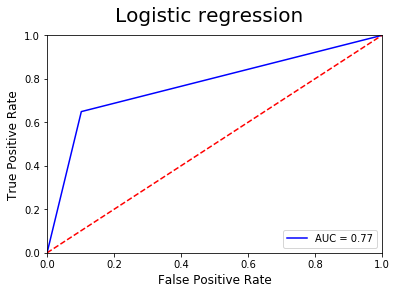

In [196]:

Log_regression = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                           ('tfidf', TfidfTransformer()), 
                           ('log', LogReg(solver='liblinear',penalty = 'l2'))])

Log_model = Log_regression.fit(X_train, y_train)

Log_prediction = Log_model.predict(X_test)
auc,f = roc(Log_prediction,'Logistic regression')

model_result = model_result.append({'Model':'Logistic regression','AUC ROC': auc,'F1':f}, ignore_index=True)


### Random Forest Classifier

/Users/shashanksharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


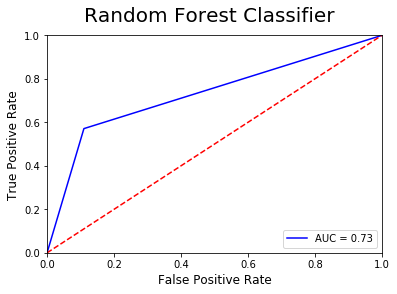

In [198]:
Random_forest = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                          ('tfidf', TfidfTransformer()), 
                          ('randomforest', RandomForestClassifier())])

RF_model = Random_forest.fit(X_train, y_train)

RF_prediction = RF_model.predict(X_test)
auc,f = roc(RF_prediction,'Random Forest Classifier')

model_result = model_result.append({'Model':'Random Forest Classifier','AUC ROC': auc,'F1':f}, ignore_index=True)

### ADA Boost Classifier

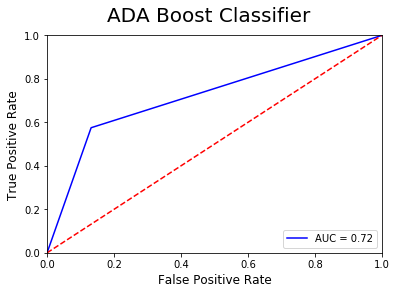

In [188]:
ada_classifier = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                          ('tfidf', TfidfTransformer()), 
                           ('Ada', AdaBoostClassifier())])

ada_model = ada_classifier.fit(X_train, y_train)

ada_prediction = ada_model.predict(X_test)
auc,f = roc(ada_prediction,'ADA Boost Classifier')

model_result = model_result.append({'Model':'ADA Boost Classifier','AUC ROC': auc,'F1':f}, ignore_index=True)

### Extra Trees Classifier

/Users/shashanksharma/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


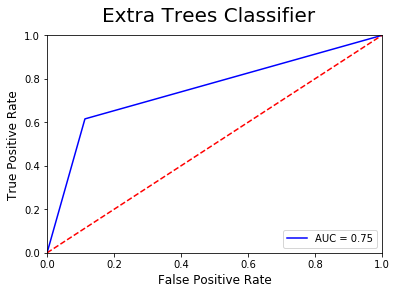

In [189]:
et_classifier = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                          ('tfidf', TfidfTransformer()), 
                          ('et', ExtraTreesClassifier())])

et_model = et_classifier.fit(X_train, y_train)

et_prediction = et_model.predict(X_test)
auc,f = roc(et_prediction,'Extra Trees Classifier')

model_result = model_result.append({'Model':'Extra Trees Classifier','AUC ROC': auc,'F1':f}, ignore_index=True)


### Gradient Boost classifier

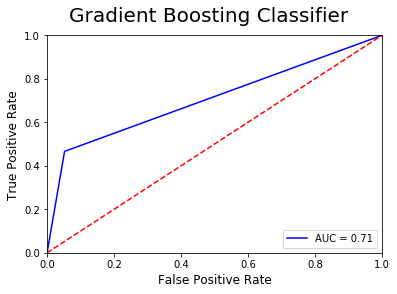

In [190]:
gb_classifier = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                          ('tfidf', TfidfTransformer()), 
                          ('gb', GradientBoostingClassifier())])

gb_model = gb_classifier.fit(X_train, y_train)

gb_prediction = gb_model.predict(X_test)
auc,f = roc(gb_prediction,'Gradient Boosting Classifier')

model_result = model_result.append({'Model':'Gradient Boosting Classifier','AUC ROC': auc,'F1':f}, ignore_index=True)

### Decision Tree Classifier

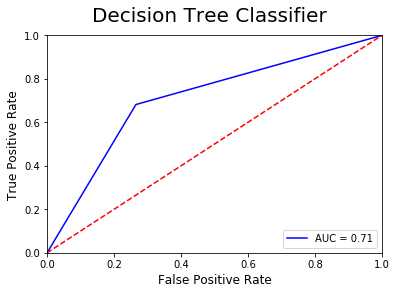

In [191]:
dt_classifier = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                          ('tfidf', TfidfTransformer()), 
                          ('dt', DecisionTreeClassifier())])

dt_model = dt_classifier.fit(X_train, y_train)

dt_prediction = dt_model.predict(X_test)
auc,f = roc(dt_prediction,'Decision Tree Classifier')

model_result = model_result.append({'Model':'Decision Tree Classifier','AUC ROC': auc,'F1':f}, ignore_index=True)



### SVM Classifier

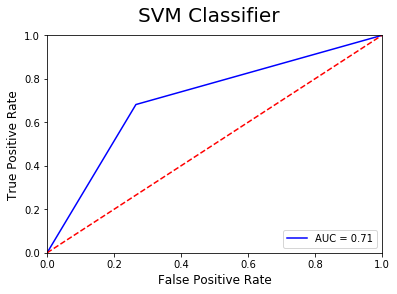

In [192]:
svm_classifier = Pipeline([('vect', CountVectorizer(ngram_range=(1,2))),
                          ('tfidf', TfidfTransformer()), 
                           ('knn', SGDClassifier())])

svm_model = svm_classifier.fit(X_train, y_train)

svm_prediction = svm_model.predict(X_test)
auc,f = roc(dt_prediction,'SVM Classifier')

model_result = model_result.append({'Model':'SVM Classifier','AUC ROC': auc,'F1':f}, ignore_index=True)


